## (Before using the code, read the technical note attached to this repository to see in detail the formulas and values used for this plot!)

## Required libraries for the plot

In [1]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import cmath
import random
from IPython import display

## Parameters and mass equations used

The parameters and fixed values are listed here separated in NH and IH parameters, same situation for the mass equations (equation 12 at the technical note), for the NH all the mass equations are in terms of $m_1$ and for the IH, in terms of $m_3$, here are not only listed the best fit values, there are also listed the +3/-3 $\sigma$ values for all the masses to get not only the best fit value plot, but also including the uncertainties for the plot.

Note that we are including $s_{14}$ and $\Delta m^2_{41}$ as $\Delta m^2_{\text{LSND}}$ to add $m_{light}$ dependence to $m_{4}$

In [2]:
#Normal hierarchy parameters (Best Fit)

NHs12=0.307
NHs13=0.022
NHc12=0.693
NHc13=0.978
NHs14=0.023
NHc14=0.977

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=1.78

#solarmass=del_m21^2
#atmmass=del_m31^2

#Normal hierarchy parameters (3 sigma)

maxNHs12=0.346
minNHs12=0.268

maxNHs13=0.0241
minNHs13=0.0199

maxNHc12=0.732
minNHc12=0.654

maxNHc13=0.9801
minNHc13=0.9759

maxNHs14=0.04
minNHs14=0.006

maxNHc14=0.96
minNHc14=0.994

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

maxLSNDmass=2.01
minLSNDmass=1.61

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

maxNHm4=(NHm1**2-minLSNDmass)**(1/2)
NHm4=(NHm1**2-LSNDmass)**(1/2)
minNHm4=(NHm1**2-maxLSNDmass)**(1/2)

C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/4153782846.py:60: RuntimeWarning: invalid value encountered in sqrt
  maxNHm4=(NHm1**2-minLSNDmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/4153782846.py:61: RuntimeWarning: invalid value encountered in sqrt
  NHm4=(NHm1**2-LSNDmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/4153782846.py:62: RuntimeWarning: invalid value encountered in sqrt
  minNHm4=(NHm1**2-maxLSNDmass)**(1/2)


In [3]:
#Inverted Hierarchy parameters (Best Fit)

IHs12=0.307
IHs13=0.022
IHc12=0.693
IHc13=0.978
IHs14=0.023
IHc14=0.977

Isolarmass=0.0000753
Iatmmass=0.002536
ILSNDmass=1.78

#Inverted Hierarchy parameters (3 sigma)

maxIHs12=0.346
minIHs12=0.268

maxIHs13=0.0241
minIHs13=0.0199

maxIHc12=0.732
minIHc12=0.654

maxIHc13=0.9801
minIHc13=0.9759

maxIHs14=0.04
minIHs14=0.006

maxIHc14=0.96
minIHc14=0.994

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

maxILSNDmass=2.01
minILSNDmass=1.61

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

maxIHm4=(IHm3**2-minILSNDmass+maxIatmmass)**(1/2)
IHm4=(IHm3**2-ILSNDmass+Iatmmass)**(1/2)
minIHm4=(IHm3**2-maxILSNDmass+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/294990200.py:57: RuntimeWarning: invalid value encountered in sqrt
  maxIHm4=(IHm3**2-minILSNDmass+maxIatmmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/294990200.py:58: RuntimeWarning: invalid value encountered in sqrt
  IHm4=(IHm3**2-ILSNDmass+Iatmmass)**(1/2)
C:\Users\pacoh\AppData\Local\Temp/ipykernel_12464/294990200.py:59: RuntimeWarning: invalid value encountered in sqrt
  minIHm4=(IHm3**2-maxILSNDmass+minIatmmass)**(1/2)


## Lobster plot 3 neutrinos for comparison purposes

This cell generates a plot for 3 neutrinos to compare it with the plots of 3+1 neutrinos.

In [4]:
NHm111=numpy.linspace(0.0001,0.001,2000) 
NHm111=numpy.append(NHm111, numpy.linspace(0.001,0.01,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.01,0.1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.1,1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(1,10,2000))

maxNHm222=(NHm111**2+maxsolarmass)**(1/2)
NHm222=(NHm111**2+solarmass)**(1/2)
minNHm222=(NHm111**2+minsolarmass)**(1/2)

maxNHm333=(NHm111**2+maxatmmass)**(1/2)
NHm333=(NHm111**2+atmmass)**(1/2)
minNHm333=(NHm111**2+minatmmass)**(1/2)



IHm333=numpy.linspace(0.0001,0.001,2000) 
IHm333=numpy.append(IHm333, numpy.linspace(0.001,0.01,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.01,0.1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.1,1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(1,10,2000))

maxIHm222=(IHm333**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm222=(IHm333**2+Isolarmass+Iatmmass)**(1/2)
minIHm222=(IHm333**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm111=(IHm333**2+maxIatmmass)**(1/2)
IHm111=(IHm333**2+Iatmmass)**(1/2)
minIHm111=(IHm333**2+minIatmmass)**(1/2)

## Neutrino animation

To make this animation, it was required to put a "time dependence" on the parameter we are interested to change with time, and that parameter in this case is $\theta_{14}$ (or in this case, $s^2_{14}$), that parameter will change depending on which frame the animation is located, and also, another important thing to preserve are the boundaries that contain all possible angle combination and the smoothness of each frame transition, fortunately, due to the nature of this plot in terms of $m_1$ for NH and $m_3$ for IH, the boundaries preserve even when $\theta_{14}$ change (well, in fact the boundaries actually change but due to the scale used and the domain of the graph, it was not required to calculate new boundaries), and those boundaries are

($\phi_{12}$, $\phi_{13}$, $\phi_{14}$) in terms of $\pi$

upper boundary= (0,0,0)\
lower boundary= (1,1,1).

Details of how the parameters change and the formulas used are located on the technical note pg 25-27 section 13.

<IPython.core.display.Javascript object>


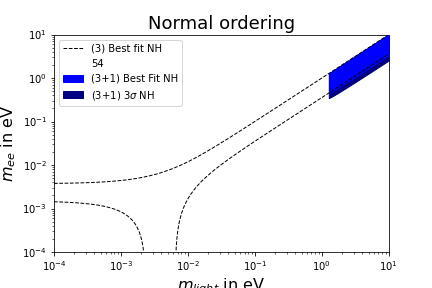

In [21]:
fig=plt.figure()

def animate(frame): 
    
    NHs14=0.023*(frame/99)
    NHc14=1-NHs14
    
    maxNHs14=0.04*(frame/99)
    maxNHc14=1-maxNHs14
    
    minNHs14=0.006*(frame/99)
    minNHc14=1-minNHs14
    
    NHmee11=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    NHmee12=abs(NHc12*NHc13*NHc14*NHm1 + 
                      NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,numpy.pi)) + 
                      NHs13*NHm3*NHc14*cmath.exp(complex(0,numpy.pi)) + 
                      NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,0 (in terms of pi)
    
    
    maxNHmee11=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    maxNHmee12=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    
    plt.cla()
    
    NHmee1=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 + NHs13*NHm333)                           
    NHmee2=abs(NHc12*NHc13*NHm111 + NHs12*NHc13*NHm222 + NHs13*NHm333)
    NHmee3=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 - NHs13*NHm333)
    
    maxNHmee1=abs(minNHc12*minNHc13*NHm111 - maxNHs12*minNHc13*maxNHm222 + maxNHs13*maxNHm333)                           
    maxNHmee2=abs(minNHc12*minNHc13*NHm111 + maxNHs12*minNHc13*maxNHm222 + maxNHs13*maxNHm333)
    maxNHmee3=abs(minNHc12*minNHc13*NHm111 - maxNHs12*minNHc13*maxNHm222 - maxNHs13*maxNHm333)
    
    minNHmee1=abs(maxNHc12*maxNHc13*NHm111 - minNHs12*maxNHc13*minNHm222 + minNHs13*minNHm333)                           
    minNHmee2=abs(maxNHc12*maxNHc13*NHm111 + minNHs12*maxNHc13*minNHm222 + minNHs13*minNHm333)
    minNHmee3=abs(maxNHc12*maxNHc13*NHm111 - minNHs12*maxNHc13*minNHm222 - minNHs13*minNHm333)

    NHm1filt1=NHm111[NHm111<0.0024]
    NHm1filt3=NHm111[NHm111>0.0065]
    NHmee1filt1=NHmee1[NHm111<0.0024]
    NHmee3filt3=NHmee3[NHm111>0.0065]
    
    pylab.plot(NHm1filt1,NHmee1filt1,color="black",label= "(3) Best fit NH",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1,NHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(0, 0 ,color="white",label=frame)
    
    if frame==0:
        plt.fill_between(NHm1, NHmee1, NHmee2, color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee1, NHmee3, color="blue",alpha=1,zorder=14)
        plt.fill_between(NHm1, NHmee2, 0,where=(NHm1>NHm1[numpy.argmin(NHmee1)])&(NHm1<NHm1[numpy.argmin(NHmee3)]), color="blue",label="(3+1) Best Fit NH",alpha=1,zorder=14)
        
        plt.fill_between(NHm1, maxNHmee1, maxNHmee2, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee1, maxNHmee3, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, maxNHmee2, 0,where=(NHm1>NHm1[numpy.argmin(maxNHmee1)])&(NHm1<NHm1[numpy.argmin(maxNHmee3)]), color="navy",label="(3+1) 3$\sigma$ NH",alpha=1,zorder=13)
        
        plt.fill_between(NHm1, minNHmee1, minNHmee2, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, minNHmee1, minNHmee3, color="navy",alpha=1,zorder=13)
        plt.fill_between(NHm1, minNHmee2, 0,where=(NHm1>NHm1[numpy.argmin(minNHmee1)])&(NHm1<NHm1[numpy.argmin(minNHmee3)]), color="navy",alpha=1,zorder=13)
    else:
        plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(3+1) Best Fit NH",alpha=1,zorder=14)
        plt.fill_between(NHm1, maxNHmee11, maxNHmee12, color="navy",label="(3+1) 3$\sigma$ NH",alpha=1,zorder=13)
        
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
    
anim = FuncAnimation(fig, animate, frames=100, interval=100)

<IPython.core.display.Javascript object>


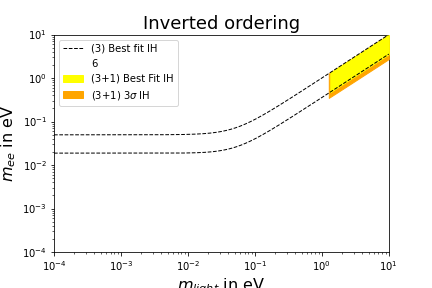

In [24]:
fig2=plt.figure()

def animate2(frame2): 
    
    IHs14=0.023*(frame2/99)
    IHc14=1-IHs14
    
    maxIHs14=0.04*(frame2/99)
    maxIHc14=1-maxIHs14
    
    minIHs14=0.006*(frame2/99)
    minIHc14=1-minIHs14
    
    IHmee11=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,0)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,0)) + 
                  IHs14*IHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    IHmee12=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    maxIHmee11=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,0)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,0)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    maxIHmee12=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    plt.cla()
    
    IHmee1=abs(IHc12*IHc13*IHm111 + IHs12*IHc13*IHm222 + IHs13*IHm333)
    IHmee2=abs(IHc12*IHc13*IHm111 - IHs12*IHc13*IHm222 - IHs13*IHm333)
    
    maxIHmee1=abs(minIHc12*minIHc13*maxIHm111 + maxIHs12*minIHc13*maxIHm222 + maxIHs13*IHm333)
    maxIHmee2=abs(minIHc12*minIHc13*maxIHm111 - maxIHs12*minIHc13*maxIHm222 - maxIHs13*IHm333)

    pylab.plot(IHm333,IHmee1,color="black",label="(3) Best fit IH",linestyle="--",linewidth=1, alpha=1,zorder=14)
    pylab.plot(IHm333,IHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=14)
    pylab.plot(0, 0, color="white",label=frame2)
    
    if frame2==0:
        plt.fill_between(IHm333, IHmee1, IHmee2, color="yellow",label="(3+1) Best Fit IH",alpha=1,zorder=14)    
        plt.fill_between(IHm333, maxIHmee1, maxIHmee2, color="orange",label="(3+1) 3$\sigma$ IH",alpha=1,zorder=13)
        
    if frame2>0:
        plt.fill_between(IHm3, IHmee11, IHmee12, color="yellow",label="(3+1) Best Fit IH",alpha=1,zorder=14)    
        plt.fill_between(IHm3, maxIHmee11, maxIHmee12, color="orange",label="(3+1) 3$\sigma$ IH",alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Inverted ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)

    
anim2 = FuncAnimation(fig2, animate2, frames=100, interval=100)

In [22]:
#anim.save("Light sterile Neutrino animation NH.gif", matplotlib.animation.PillowWriter(fps=15))

In [25]:
#anim2.save("Light sterile Neutrino animation IH.gif", matplotlib.animation.PillowWriter(fps=15))